## 1. Insights


## 2. Implementation


### 2.1. Import dependecies

In [1]:

import os, inspect
import time
import numpy as np
import pandas as pd
from newssentiment import TweetSentiment 
from newssentiment.plot import Scatter
from newssentiment.plot import Bar

# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)



### 2.2. Setup run parameters

In [2]:

# set number of query tweets
n_tweets = 20
# set query outlets
outlets = ["@CNN", "@BBC", "@CBS", "@FoxNews", "@nytimes"]
colors = ["red", "brown", "gold", "blue", "gray"] 
# set path to save figures
path_fig = os.path.join("reports", "figures")
path_log = os.path.join("reports", "logs")
# set true to save figures
save_fig = True
# set true to save results to csv
save_csv = True
# set true to log print
verbose = True


In [3]:
# get/format current time
currtime = time.gmtime()
currtimestr = time.strftime("'%Y-%m-%d %H:%M (UTC)'", currtime) 


###  2.3. Get media tweets sentiments


In [5]:

sentiment = TweetSentiment(n_tweets=n_tweets)
df = sentiment.get_scores(outlets=outlets)
df.head(10)


,Outlet,Date,Positive,Negative,Neutral,Compound,Tweets Ago
0,@CNN,Sat Jun 02 08:30:12 +0000 2018,0.154,0.846,0.000,0.4767,0
1,@CNN,Sat Jun 02 08:15:07 +0000 2018,0.000,1.000,0.000,0.0000,1
2,@CNN,Sat Jun 02 08:00:17 +0000 2018,0.156,0.844,0.000,0.3612,2
3,@CNN,Sat Jun 02 07:45:04 +0000 2018,0.138,0.862,0.000,0.4939,3
4,@CNN,Sat Jun 02 07:30:06 +0000 2018,0.369,0.631,0.000,0.8602,4
5,@CNN,Sat Jun 02 07:15:00 +0000 2018,0.000,1.000,0.000,0.0000,5
6,@CNN,Sat Jun 02 07:00:07 +0000 2018,0.000,0.920,0.080,-0.1027,6
7,@CNN,Sat Jun 02 06:45:00 +0000 2018,0.161,0.839,0.000,0.3612,7
8,@CNN,Sat Jun 02 06:30:00 +0000 2018,0.000,0.887,0.113,-0.4215,8
9,@CNN,Sat Jun 02 06:15:03 +0000 2018,0.000,1.000,0.000,0.0000,9



### 2.4. Save score data

In [6]:

if save_csv:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime) 
    df.to_csv(os.path.join(path_log, f"outlets-tweets-scores-{t}.csv"))



### 2.5. Scatter plot

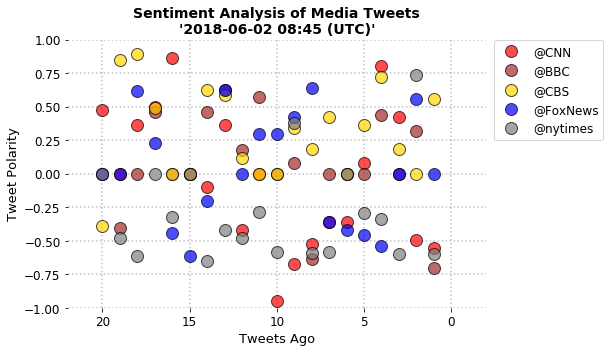

In [7]:

# time
x = df["Date"].map(lambda d: pd.to_datetime(d))[0:n_tweets]
x = np.linspace(n_tweets, 1, n_tweets)
title = f"Sentiment Analysis of Media Tweets" + os.linesep + f"{currtimestr}"

scatter = Scatter()
scatter.figsize = (15, 12)
scatter.markersize = 12
scatter.markeredgewidth = 1
scatter.markeredgecolor = "black"
scatter.alpha = 0.7
scatter.xlim = [n_tweets+2, -2]
scatter.ylim = [-1, 1]
scatter.xlabel = "Tweets Ago"
scatter.ylabel = "Tweet Polarity"
scatter.title = title
# scatter.fig.patch.set_visible(False)
scatter.ax.spines['top'].set_visible(False)
scatter.ax.spines['right'].set_visible(False)
scatter.ax.spines['bottom'].set_visible(False)
scatter.ax.spines['left'].set_visible(False)

for outlet, color in zip(outlets, colors):
    scatter.markerfacecolor = color
    scatter.label = outlet
    scatter(x, df["Compound"][df["Outlet"] == outlet])
scatter.ax.legend(loc=9,
                  bbox_to_anchor=(1.15, 1.02),
                  ncol=1,
                  markerscale=1,
                  fontsize=12,
                  labelspacing=0.53)

if save_fig:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime) 
    scatter.fig.savefig(os.path.join(path_fig, f"compound-scatter-{t}"),
                        transparent=False, bbox_inches="tight")


### 2.6. Overall sentiments

In [8]:
# get overall average scores
gdf = df.groupby("Outlet")
mean_df = pd.DataFrame(gdf["Compound"].mean())
mean_df

,Compound
Outlet,
@BBC,0.069450
@CBS,0.296415
@CNN,-0.029680
@FoxNews,0.032010
@nytimes,-0.286205


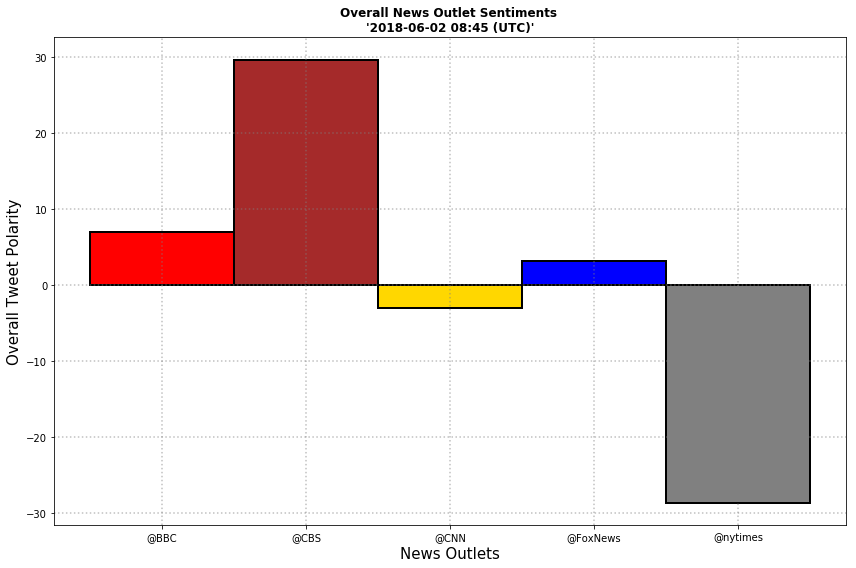

In [14]:
x = mean_df.index.values
y = mean_df["Compound"].values * 100
ylabel = "Overall Tweet Polarity"
xlabel = "News Outlets"
title = f"Overall News Outlet Sentiments (%) " + os.linesep + f"{currtimestr}"

bar = Bar()
bar.labelfontsize = 15
bar.title = title
bar.ylabel = ylabel
bar.xlabel = xlabel
bar(x=x, y=y, colors=colors) 

if save_fig:
    t = time.strftime("%Y-%m-%d-%H-%M", currtime)
    bar.fig.savefig(os.path.join(path_fig, f"sentiments-barchart-{t}"),
                        transparent=False, bbox_inches="tight")


In [10]:
colors

['red', 'brown', 'gold', 'blue', 'gray']